# TAREA 4
Nombre: Victor Pineda <br>
Modelo: K Means

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e1/Logo_unad_color.png" alt="Logo" width="150">

Punto 1

In [938]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [939]:
dataset = pd.read_csv("Mall_Customers.csv")

In [940]:
dataset.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [941]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

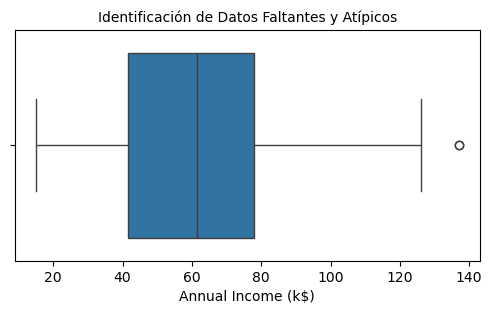

In [942]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=dataset['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Parte 2

In [944]:
print("Cantidad de Registros con cero en Edad: ",dataset['Age'].isin([28]).sum())
print("Cantidad de Registros con cero en Data Credito: ",dataset['Annual Income (k$)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  4
Cantidad de Registros con cero en Data Credito:  0


In [945]:
dataset['Age']=dataset['Age'].replace(0,dataset['Age'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

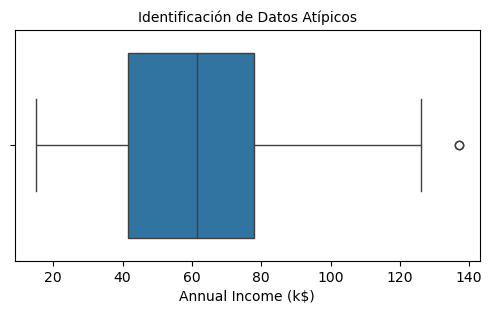

In [946]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=dataset['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

Parte 3

In [948]:
dataset = dataset[['Spending Score (1-100)', 'Age','Annual Income (k$)']]

In [949]:
dataset.head(10)

,Spending Score (1-100),Age,Annual Income (k$)
0,39,19,15
1,81,21,15
2,6,20,16
3,77,23,16
4,40,31,17
5,76,22,17
6,6,35,18
7,94,23,18
8,3,64,19
9,72,30,19


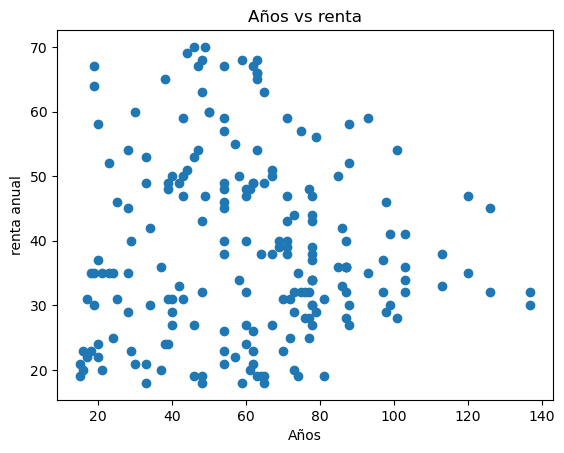

In [950]:
plt.scatter(dataset['Annual Income (k$)'], dataset['Age'])
plt.xlabel('Años')
plt.ylabel('renta anual')
plt.title('Años vs renta')
plt.show()

Parte 4

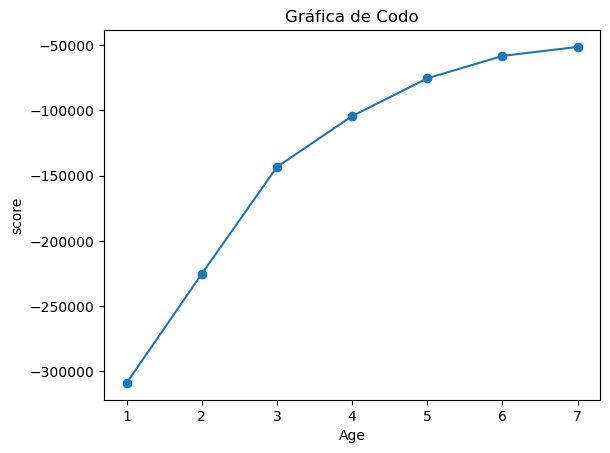

In [952]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Age')
plt.ylabel('score')
plt.title('Gráfica de Codo')
plt.show()

In [953]:
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(dataset)

KMeans(n_clusters=5, random_state=0)

In [954]:
Modelo.labels_
dataset["Age"] = Modelo.labels_ 
print (dataset)

     Spending Score (1-100)  Age  Annual Income (k$)
0                        39    2                  15
1                        81    2                  15
2                         6    0                  16
3                        77    2                  16
4                        40    0                  17
..                      ...  ...                 ...
195                      79    1                 120
196                      28    3                 126
197                      74    1                 126
198                      18    3                 137
199                      83    1                 137

[200 rows x 3 columns]


parte 5

In [956]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(dataset)
X = dataset.drop('Age', axis=1)
clusters = dataset['Age']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.3436366249664055 |
| Indice Calinski Harabasz | 159.81790784464962 |
|  Indice Davies Bouldin   | 0.9876778221648749 |
+--------------------------+--------------------+


Parte 6

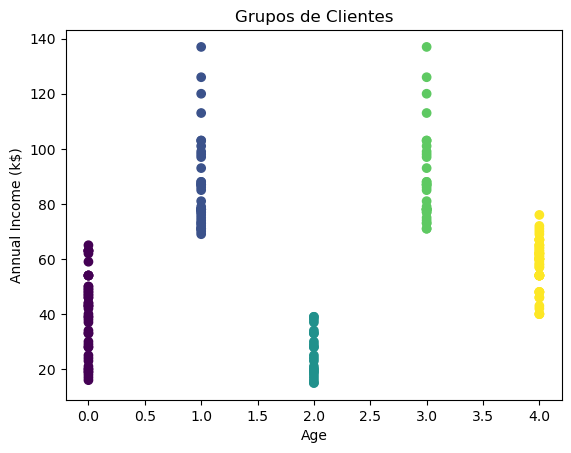

In [958]:
plt.scatter(dataset['Age'], dataset['Annual Income (k$)'], c=dataset['Age'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Grupos de Clientes')
plt.show()